# Rough Work 2

In [35]:
import numpy as np
import random
import networkx as nx

In [36]:
L,B,H=5,5,10

In [37]:
n=random.randint(2,int((L*B*H)**1/3))
n

46

In [38]:
#vertices
verts=[]
for _ in range(n):
    x=(round(random.uniform(0,L),6))
    y=(round(random.uniform(0,B),6))
    z=(round(random.uniform(0,H),6))
    verts.append([x,y,z])
verts

[[4.497143, 2.063756, 0.887102],
 [3.09245, 3.285561, 8.181804],
 [3.001507, 2.612021, 4.17484],
 [3.116339, 3.431527, 1.70487],
 [3.069439, 1.968412, 4.974836],
 [0.373283, 0.950906, 2.371692],
 [4.902462, 4.755309, 8.789665],
 [1.328308, 2.449926, 4.017779],
 [4.611718, 3.655978, 3.070949],
 [1.452018, 3.736561, 3.457038],
 [2.248929, 1.498282, 5.10977],
 [3.623548, 4.727634, 5.059092],
 [4.263695, 3.184841, 3.797894],
 [1.983478, 0.679205, 2.561687],
 [0.491081, 2.192655, 4.051488],
 [3.151041, 4.803092, 6.585292],
 [2.941704, 1.998261, 1.771167],
 [0.04461, 2.400723, 0.373736],
 [1.261716, 1.435821, 6.879212],
 [1.931017, 0.787995, 8.521104],
 [1.727909, 3.599197, 3.295365],
 [1.605557, 2.292647, 3.040016],
 [4.5369, 0.916481, 6.39229],
 [1.582734, 4.446501, 2.064476],
 [4.293539, 3.86452, 8.191685],
 [2.151547, 1.948295, 6.518964],
 [2.337738, 1.970389, 4.520632],
 [0.158586, 0.955312, 0.766914],
 [0.790324, 0.685164, 0.852522],
 [0.529986, 3.684009, 4.707224],
 [1.115168, 3.71772

In [39]:
len(verts)

46

In [40]:
#edges
edges=[]
i=1
for j in range(len(verts)-1):
    edges.append([j,i])
    i+=1
edges

[[0, 1],
 [1, 2],
 [2, 3],
 [3, 4],
 [4, 5],
 [5, 6],
 [6, 7],
 [7, 8],
 [8, 9],
 [9, 10],
 [10, 11],
 [11, 12],
 [12, 13],
 [13, 14],
 [14, 15],
 [15, 16],
 [16, 17],
 [17, 18],
 [18, 19],
 [19, 20],
 [20, 21],
 [21, 22],
 [22, 23],
 [23, 24],
 [24, 25],
 [25, 26],
 [26, 27],
 [27, 28],
 [28, 29],
 [29, 30],
 [30, 31],
 [31, 32],
 [32, 33],
 [33, 34],
 [34, 35],
 [35, 36],
 [36, 37],
 [37, 38],
 [38, 39],
 [39, 40],
 [40, 41],
 [41, 42],
 [42, 43],
 [43, 44],
 [44, 45]]

In [41]:
len(edges)

45

In [42]:
#sub surf
ss=random.randint(0,6)
ss

3

In [43]:
#roughness
ro=round(random.uniform(0,0.5),6)
ro

0.483861

In [44]:
#metallic
me=round(random.uniform(0,1.0),6)
me

0.337485

In [45]:
#bevel depth
bd=round(random.uniform(0.75,1.75),6)
bd

1.560532

In [46]:
#colour
r=round(random.uniform(0,1),6)
g=round(random.uniform(0,1),6)
b=round(random.uniform(0,1),6)
a=round(random.uniform(0.25,1),6)
print(f"R: {r}\nG: {g}\nB: {b}\nA: {a}")

R: 0.429603
G: 0.229814
B: 0.03362
A: 0.646425


## Angles

In [54]:
import numpy as np

def find_edge_angles_y_axis(vertices, edges):
    angles = []
    for edge in edges:
        vertex1, vertex2 = np.array(vertices[edge[0]]), np.array(vertices[edge[1]])
        edge_vector = vertex2 - vertex1
        edge_normal = np.cross(edge_vector, np.array([0, 1, 0]))
        edge_normal /= np.linalg.norm(edge_normal)
        angle = np.arccos(np.dot(edge_normal, np.array([0, 1, 0])))
        angles.append(angle)
    return angles


In [78]:
import numpy as np

def find_angles(vertices,edges):
    angles=[]
    for edge in edges:
        vertex1, vertex2 = edge
        p1, p2 = vertices[vertex1], vertices[vertex2]
        p1, p2 = np.array(p1), np.array(p2)
        vector1 = p2 - p1
        vector2 = p1 - p2
        dot_product = np.dot(vector1,vector2)
        norm1 = np.linalg.norm(vector1)
        norm2 = np.linalg.norm(vector2)
        cos_theta = dot_product / (norm1 * norm2)
        theta = np.arccos(cos_theta)
        angles.append(np.degrees(theta))
    return angles


In [80]:
find_angles(verts,edges)

C:\Users\imvee\AppData\Local\Temp/ipykernel_27264/2854997295.py:15: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(cos_theta)


[180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 179.99999879258172,
 nan,
 nan,
 180.0,
 180.0,
 180.0,
 180.0,
 nan,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 nan,
 180.0,
 179.99999879258172,
 179.99999914622634,
 180.0,
 180.0,
 nan,
 nan,
 180.0,
 180.0,
 179.99999914622634,
 179.99999914622634,
 180.0,
 179.99999914622634,
 180.0,
 179.99999879258172,
 180.0,
 nan,
 180.0,
 180.0,
 180.0,
 180.0,
 179.99999914622634,
 180.0,
 179.99999879258172]

In [65]:
def calculate_angles(vertices, edges):
    angles = []
    for i, edge in enumerate(edges):
        v1, v2 = edge
        v3 = edges[(i + 1) % len(edges)][1]
        a = math.sqrt((vertices[v2][0] - vertices[v1][0]) ** 2 + (vertices[v2][1] - vertices[v1][1]) ** 2 + (vertices[v2][2] - vertices[v1][2]) ** 2)
        b = math.sqrt((vertices[v3][0] - vertices[v2][0]) ** 2 + (vertices[v3][1] - vertices[v2][1]) ** 2 + (vertices[v3][2] - vertices[v2][2]) ** 2)
        c = math.sqrt((vertices[v3][0] - vertices[v1][0]) ** 2 + (vertices[v3][1] - vertices[v1][1]) ** 2 + (vertices[v3][2] - vertices[v1][2]) ** 2)
        if a==0:
            print("a")
        if b==0:
            print("a")
        if c==0:
            print("a")
        angle = math.acos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c))
        angles.append(math.degrees(angle))
    
    angle_bins = {f"{i}-{i+5}": 0 for i in range(0, 356, 5)}
    for angle in angles:
        bin_number = int(angle // 5) * 5
        angle_bins[f"{bin_number}-{bin_number+5}"] = 1
    
    score=0
    for b in angle_bins:
        score+=angle_bins[b]
    
    return round(score/72,6),angle_bins


In [69]:
import numpy as np

def find_edge_angles_y_axis(vertices, edges):
    angles = []
    for edge in edges:
        vertex1, vertex2 = np.array(vertices[edge[0]]), np.array(vertices[edge[1]])
        edge_vector = vertex2 - vertex1
        edge_vector = edge_vector/np.linalg.norm(edge_vector)
        print(edge_vector)
        angle = np.arccos(np.dot(edge_vector, np.array([0, 1, 0])))
        angles.append(angle)
    return angles

find_edge_angles_y_axis(verts, edges)

[-0.18658283  0.16229015  0.96894208]
[-0.02237663 -0.16572528 -0.98591806]
[ 0.044083    0.31460115 -0.94819977]
[-0.01309077 -0.40838583  0.91271553]
[-0.69427399 -0.26201301 -0.67032292]
[0.51892744 0.43588675 0.73533466]
[-0.55914273 -0.36065545 -0.74651661]
[ 0.90607155  0.3328154  -0.26128194]
[-0.99229926  0.02530698  0.1212507 ]
[ 0.27534612 -0.77336295  0.57104664]
[ 0.39161727  0.92001493 -0.01443773]
[ 0.30585246 -0.73712294 -0.60258115]
[-0.63227716 -0.69478318 -0.34278555]
[-0.57496559  0.58307653  0.57396544]
[0.59022946 0.57924059 0.56223618]
[-0.03754557 -0.50305955 -0.86343582]
[-0.89372465  0.12415552 -0.43109355]
[ 0.18197489 -0.14426676  0.97266245]
[ 0.35455698 -0.34318076  0.86977946]
[-0.03420837  0.47347533 -0.88014255]
[-0.09152061 -0.97731342 -0.19100379]
[ 0.62891693 -0.29525514  0.71922729]
[-0.46757351  0.55871737 -0.68498899]
[ 0.40307483 -0.08653588  0.91106653]
[-0.64413767 -0.57624524 -0.50301897]
[ 0.09276577  0.01100787 -0.99562711]
[-0.48887095 -0.22

[1.4077851968732784,
 1.7372897470545001,
 1.2507598876931119,
 1.9914813367677804,
 1.835903821465539,
 1.1197730117977363,
 1.93976687466672,
 1.2315087165483525,
 1.5454866489397676,
 2.454925092276512,
 0.4026777487212061,
 2.399599214834584,
 2.338914711052305,
 0.9482858720323376,
 0.9529995528444926,
 2.097931585060054,
 1.4463196060004944,
 1.7155682672255772,
 1.9210975614474386,
 1.0775640964858613,
 2.928178133695156,
 1.8705188835035362,
 0.9779578725781328,
 1.6574405738808917,
 2.1849233087793976,
 1.5597882312419817,
 1.8005342818653711,
 1.971610746588333,
 0.9107354935338846,
 1.556121759093072,
 2.1103503864078395,
 1.2677326418459993,
 2.544482126799857,
 1.0833311754904984,
 1.7239565076201804,
 2.2590696248437983,
 1.0524906148039146,
 1.4082804161431812,
 2.415161401636503,
 1.8375353614632686,
 0.818492916668776,
 2.778146847227265,
 0.6834458229710392,
 1.8947957706467524,
 0.7685854962867346]

In [66]:
calculate_angles(verts,edges)

(0.319444,
 {'0-5': 0,
  '5-10': 1,
  '10-15': 1,
  '15-20': 1,
  '20-25': 1,
  '25-30': 1,
  '30-35': 1,
  '35-40': 1,
  '40-45': 1,
  '45-50': 1,
  '50-55': 1,
  '55-60': 1,
  '60-65': 1,
  '65-70': 1,
  '70-75': 1,
  '75-80': 0,
  '80-85': 1,
  '85-90': 1,
  '90-95': 1,
  '95-100': 1,
  '100-105': 1,
  '105-110': 1,
  '110-115': 0,
  '115-120': 0,
  '120-125': 0,
  '125-130': 0,
  '130-135': 0,
  '135-140': 0,
  '140-145': 1,
  '145-150': 0,
  '150-155': 1,
  '155-160': 0,
  '160-165': 1,
  '165-170': 0,
  '170-175': 0,
  '175-180': 0,
  '180-185': 0,
  '185-190': 0,
  '190-195': 0,
  '195-200': 0,
  '200-205': 0,
  '205-210': 0,
  '210-215': 0,
  '215-220': 0,
  '220-225': 0,
  '225-230': 0,
  '230-235': 0,
  '235-240': 0,
  '240-245': 0,
  '245-250': 0,
  '250-255': 0,
  '255-260': 0,
  '260-265': 0,
  '265-270': 0,
  '270-275': 0,
  '275-280': 0,
  '280-285': 0,
  '285-290': 0,
  '290-295': 0,
  '295-300': 0,
  '300-305': 0,
  '305-310': 0,
  '310-315': 0,
  '315-320': 0,
  '320-

In [14]:
import math

In [17]:
angles,b=calculate_angles(verts,edges)
angles

0.277778

In [20]:
len(b)

72

In [39]:
def create_angle_bins(angles):
    angle_bins = {f"{i}-{i+10}": 0 for i in range(0, 351, 10)}
    for angle in angles:
        bin_number = int(angle // 10) * 10
        angle_bins[f"{bin_number}-{bin_number+10}"] = 1
    return angle_bins

In [40]:
a_bins=create_angle_bins(angles)
a_bins

{'0-10': 0,
 '10-20': 1,
 '20-30': 1,
 '30-40': 1,
 '40-50': 1,
 '50-60': 1,
 '60-70': 1,
 '70-80': 1,
 '80-90': 1,
 '90-100': 1,
 '100-110': 1,
 '110-120': 1,
 '120-130': 0,
 '130-140': 0,
 '140-150': 1,
 '150-160': 1,
 '160-170': 0,
 '170-180': 0,
 '180-190': 0,
 '190-200': 0,
 '200-210': 0,
 '210-220': 0,
 '220-230': 0,
 '230-240': 0,
 '240-250': 0,
 '250-260': 0,
 '260-270': 0,
 '270-280': 0,
 '280-290': 0,
 '290-300': 0,
 '300-310': 0,
 '310-320': 0,
 '320-330': 0,
 '330-340': 0,
 '340-350': 0,
 '350-360': 0}

In [43]:
score=0
for b in a_bins:
    score+=a_bins[b]

score

13

In [30]:
len(angles)

66

## Assortativity

In [11]:
def assortativity(vertices, edges):
    adj_matrix = np.zeros((len(vertices), len(vertices)))
    for edge in edges:
        adj_matrix[edge[0]][edge[1]] = 1
        adj_matrix[edge[1]][edge[0]] = 1
    
    degrees = np.sum(adj_matrix, axis=1)
    
    dot_product = np.dot(adj_matrix, degrees)
    
    numerator = np.sum(dot_product * degrees) / (np.sum(degrees) ** 2)
    denominator = np.sum(degrees ** 2) / (np.sum(degrees) ** 2)
    assortativity = numerator / denominator - 1
    
    return round(assortativity,6)


In [12]:
assortativity(verts,edges)

0.984733

## Edge Betweeness

In [13]:
def edge_betweenness(vertices, edges):
    G = nx.DiGraph()
    G.add_nodes_from(vertices)
    G.add_edges_from(edges)

    edge_betweenness = nx.edge_betweenness_centrality(G)
    
    total=0
    for i in edge_betweenness:
        total+=edge_betweenness[i]
        
    return round(total/len(edge_betweenness),6)

In [14]:
edge_betweenness(verts,edges)

0.042607

## Clustering Coeffificent

In [15]:
def clustering_coefficient(vertices, edges):
    G = nx.Graph()
    G.add_nodes_from(vertices)
    G.add_edges_from(edges)
    return nx.average_clustering(G)

In [16]:
clustering_coefficient(verts,edges)

0.0

In [64]:
from scipy.spatial import Delaunay
import numpy as np

#create the points to be used in constructing the 3D shape
import numpy as np

# Generate a set of random points
num_points = 5
vertices = np.random.rand(num_points, 3)
print(vertices)

#create a Delaunay object using the points
tri = Delaunay(vertices)

# Calculate the volume
tetra = vertices[tri.simplices]
print(tri.simplices)
volumes = np.zeros(len(tetra))

for i, t in enumerate(tetra):
    a, b, c, d = t
    v = (1.0/6.0) * np.abs(np.dot(b - a, np.cross(c - a, d - a)))
    volumes[i] = v

total_volume = np.sum(volumes)
print(total_volume)

[[0.19800889 0.26820742 0.91920782]
 [0.96432483 0.65008468 0.08627058]
 [0.10574572 0.25586666 0.85089239]
 [0.26949787 0.19921319 0.10344818]
 [0.23508251 0.15323808 0.01048979]]
[[3 0 1 2]
 [3 0 4 2]
 [3 0 4 1]]
0.006869892731107786


In [3]:
import numpy as np
from scipy.optimize import minimize
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Convert the image data into a feature matrix
X = digits.data
y = digits.target

# Define the objective functions
def accuracy(x):
    # Define a simple linear classifier with weights given by x
    w = x
    preds = np.argmax(X @ w, axis=1)
    return np.mean(preds == y)

def complexity(x):
    # Define the complexity of the model as the L1 norm of the weights
    return np.sum(np.abs(x))

# Define the optimization problem
def obj(x):
    return [-accuracy(x), complexity(x)]

# Define the bounds for the weights
bounds = [(0, 1) for i in range(X.shape[1])]

# Use the NSGA-II algorithm to optimize the objectives
result = minimize(obj, x0=np.ones(X.shape[1]), method='nsga2', bounds=bounds)

# Print the best solutions
for i, sol in enumerate(result.x):
    print(f'Solution {i+1}: accuracy={-obj(sol)[0]}, complexity={obj(sol)[1]}')


ValueError: Unknown solver nsga2

In [5]:
!pip install pymoo



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\imvee\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


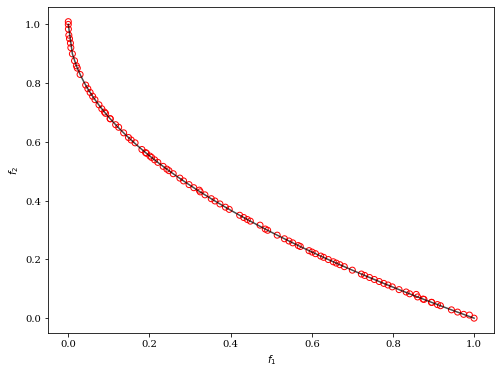

In [11]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()